# Investigación Corta 1

## Pre-procesamiento de los datos

El pre-procesado es la primera etapa en el aprendizaje automatizado (Machine Learning). Se le aplica a todos los set de datos que se decean procesar y analisar.

Primero que todo se importan las librerías necesarias.

In [1]:
# Librería para el majeno de set de datos
import pandas as pd
# Librería numérica
import numpy as np
# Librería para graficar
import matplotlib.pyplot as plt

Posteriormente se cargar el *dataset*.

In [2]:
filename = "hcvdat0.csv"
df = pd.read_csv(filename,engine="python",delimiter='\,')
df.head()

,"""""","""Category""","""Age""","""Sex""","""ALB""","""ALP""","""ALT""","""AST""","""BIL""","""CHE""","""CHOL""","""CREA""","""GGT""","""PROT"""
0,"""1""","""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""2""","""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""3""","""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""4""","""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""5""","""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Mejorar un poco los nombres de las columnas

In [3]:
for label in df.columns:
    df.rename({label:label[1:len(label)-1]},axis=1,inplace=True)
df

,,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""1""","""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""2""","""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""3""","""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""4""","""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""5""","""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""611""","""3=Cirrhosis""",62,"""f""",32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""612""","""3=Cirrhosis""",64,"""f""",24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""613""","""3=Cirrhosis""",64,"""f""",29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""614""","""3=Cirrhosis""",46,"""f""",33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


La primera columna no aporta nada. Así que se puede eliminar.

In [4]:
del df[""]
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""3=Cirrhosis""",62,"""f""",32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""3=Cirrhosis""",64,"""f""",24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""3=Cirrhosis""",64,"""f""",29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""3=Cirrhosis""",46,"""f""",33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Información del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


De la información obtenida se puede observar que la columnas **ALB**, **ALP**, **ALT**, **CHOL** y **PROT** presentan datos faltantes.

## Outliers

Antes de rellenar los valores faltantes. Es importante encontrar los *outliers* o valores fuera del rango normal.
Para dicha labor se usará la siguiente función:

In [6]:
def detect_outliers(data_1,threshold=3):
    outliers=[]
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

Para saber cuales valores estan fuera del rango habitual se colsulto la enciclopedia de la universidad de Rochester [2]. Se encontraron los siguientes rangos:

* **ALB**: *Albumin* (34 - 54 g/L).
* **ALP**: *Alkaline phosphatase* (44 - 147 U/L)
* **ALT**: *Alanine-amino-transferas* (menos de 44 - 1000 IU/L)
* **AST**: *Aspartate amino-transferase* (9 - 40 units/L)
* **BIL**: *Bilirubin* (10 - 25 mg/L)
* **CHE**: *Cholinesterase* ¡No se encontro un rango claro con el cual trabajar!
* **CHOL**: *Cholesterol* ¡No se encontro un rango claro con el cual trabajar!
* **CREA**: *Creatinine* (9 - 13 mg/L)
* **GGT**: *$\gamma$-glutamyl-transferase* (5 - 61 IU/L) [x7 para recien nacidos].
* **PROT**: *Proteina* (36 - 52 g/L)

In [7]:
print("ALB outliers:",detect_outliers(df[df.columns[3]],4))
print("ALP outliers:",detect_outliers(df[df.columns[4]],3))
print("ALT outliers:",detect_outliers(df[df.columns[5]],10))
print("AST outliers:",detect_outliers(df[df.columns[6]],3))
print("BIL outliers:",detect_outliers(df[df.columns[7]],3))
print("CHE outliers:",detect_outliers(df[df.columns[8]],8))
print("CHOL outliers:",detect_outliers(df[df.columns[9]],8))
print("CREA outliers:",detect_outliers(df[df.columns[10]],2))
print("GGT outliers:",detect_outliers(df[df.columns[11]],3))
print("PROT outliers:",detect_outliers(df[df.columns[12]],6))

ALB outliers: [82.2, 14.9]
ALP outliers: [208.2, 190.7, 416.6]
ALT outliers: [325.3]
AST outliers: [188.7, 146.6, 164.2, 187.7, 324.0, 187.9, 161.9, 263.1, 185.0, 319.8, 181.8, 143.2, 150.0, 285.8]
BIL outliers: [200.0, 254.0, 91.0, 119.0, 209.0, 117.0, 200.0]
CHE outliers: []
CHOL outliers: []
CREA outliers: [519.0, 1079.1, 485.9]
GGT outliers: [239.0, 345.6, 218.3, 295.6, 392.2, 491.0, 399.5, 273.7, 400.3, 650.9]
PROT outliers: []


Si bien se obtuvieron valores que se salen del rango encontrado para cada atributo. Se considera poco prudente cambiar esos datos ya que al tratarse de datos médicos y al no ser un experto, no se tiene el conocimiento suficiente para saber si son datos erroneos o datos que reflejan una anomalía de salud.

 ## Valores faltantes
 
 Como se había encontrado anteriormente en las columnas **ALB**, **ALP**, **ALT**, **CHOL** y **PROT** hay datos faltantes.

In [8]:
change = True
label="ALB";df[label].fillna(df[label].mean(),inplace=change)
label="ALP";df[label].fillna(df[label].mean(),inplace=change)
label="ALT";df[label].fillna(df[label].mean(),inplace=change)
label="CHOL";df[label].fillna(df[label].mean(),inplace=change)
label="PROT";df[label].fillna(df[label].mean(),inplace=change)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


## EDA

Descripción estadística del *dataset*

In [9]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Visualización de los datos.

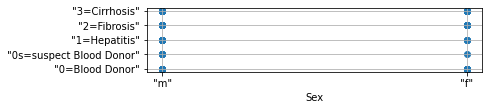

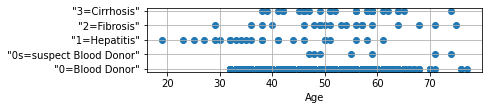

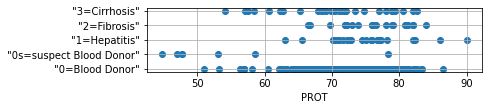

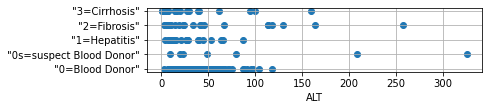

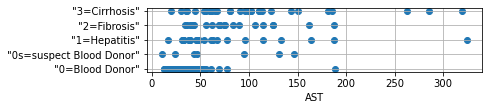

In [10]:
label = "Sex"
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = "Age"
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'PROT'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'ALT'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'AST'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

 Observando las gráficas se pueden tener algunas conclusiones preliminares. Como por ejemplo, pareciera no haber relación entre la categorización y el sexo. Por otro lado pareciera haber una relación entre el **ALT** y el **AST**. Además de una vaga relación entre la edad y **PROT**. 

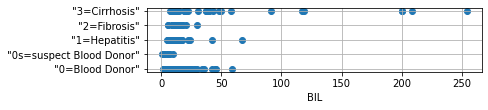

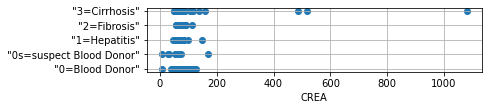

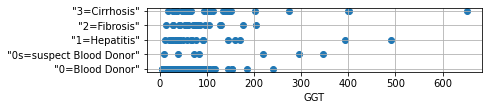

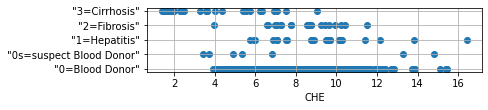

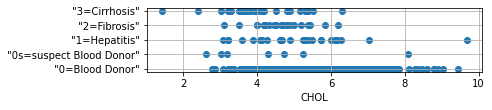

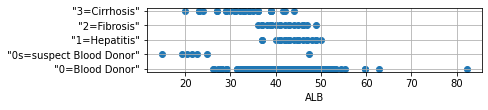

In [11]:
label = 'BIL'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CREA'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'GGT'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CHE'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CHOL'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'ALB'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

También se observa una relación entre **BIL**, **CREA** y **GGT**. Y una relación entre **CHE** y **CHOL**. Además de una vaga relación entre estos últimos y **ALB**.

## Transformación

Se sustituye ***m*** por *uno* y ***f*** por *cero*.

In [12]:
df.replace(to_replace="m",value=1,regex=True,inplace=True)
df.replace(to_replace="f",value=0,regex=True,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""0=Blood Donor""",32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""0=Blood Donor""",32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""0=Blood Donor""",32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""0=Blood Donor""",32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""0=Blood Donor""",32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""3=Cirrhosis""",62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""3=Cirrhosis""",64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""3=Cirrhosis""",64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""3=Cirrhosis""",46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Para transformar la columna **Category** se puede realizar una transformación como la hecha anteriormente.

In [14]:
aux = df.copy()
df.replace(to_replace="0=Blood Donor",value=0,regex=True,inplace=True)
df.replace(to_replace="0s=suspect Blood Donor",value=1,regex=True,inplace=True)
df.replace(to_replace="1=Hepatitis",value=2,regex=True,inplace=True)
df.replace(to_replace="2=Fibrosis",value=3,regex=True,inplace=True)
df.replace(to_replace="3=Cirrhosis",value=4,regex=True,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


O también se puede realiza una codificación usando *OneHotEncode*.

In [15]:
df_2 = pd.get_dummies(aux,drop_first=True)
df_2

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,"Category_""0s=suspect Blood Donor""","Category_""1=Hepatitis""","Category_""2=Fibrosis""","Category_""3=Cirrhosis"""
0,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0,0,0
1,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0,0,0
2,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0,0,0
3,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0,0,0
4,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,0,0,1
611,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,0,0,1
612,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0,0,0,1
613,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0,0,0,1


## Referencias

* [1] [Dataset](https://archive.ics.uci.edu/ml/datasets/HCV+data)
* [2] [Enciclopedia médica de la Universidad de Rochester](https://www.urmc.rochester.edu/encyclopedia.aspx)